In [2]:
import pandas as pd
import spacy
import nltk
import re

import seaborn as sns
import string

import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud,STOPWORDS

from PIL import Image
import numpy as np

## Sentiment Analysis

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
data = pd.read_csv('Product_reviews.csv')
data.columns

Index(['title', 'rating', 'body', 'date'], dtype='object')

In [5]:
df = data.copy().drop(columns=['date', 'title'])
print(len(df))
df.head()

557


,rating,body
0,5.0,IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...
1,1.0,"Earlier I gave a positive review, but after us..."
2,5.0,Inalsa Air Fryer...this is awesome product ......
3,2.0,I bought this in the prime day sale on 15th Ju...
4,1.0,Product has manufacturing defect as the right ...


In [6]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
df.dropna(inplace=True)

blanks = []  # start with an empty list

for i,rt,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

df.drop(blanks, inplace=True)
print(len(df))

557


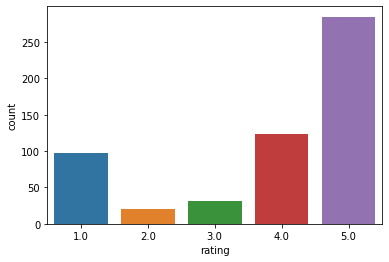

In [7]:
sns.countplot(data= df, x='rating');

In [ ]:
for i in range(5):
    print(df['cleaned review'][i])
    print('\n')


In [9]:
def clean_text(review):
    
    # remove numbers
    review = re.sub('[\d]+','',review) 
    # remove punctuation
    return "".join([x for x in review if x not in string.punctuation]) 
    

In [10]:
df['cleaned review'] = df['body'].apply(lambda x:clean_text(x))

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['compound_score'] = df['cleaned review'].apply(lambda review: sid.polarity_scores(review)).apply(lambda score_dict: score_dict['compound'])
# = df['scores']
df['sentiment'] = df['compound_score'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,rating,body,cleaned review,compound_score,sentiment
0,5.0,IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...,IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...,0.9594,pos
1,1.0,"Earlier I gave a positive review, but after us...",Earlier I gave a positive review but after usi...,0.7941,pos
2,5.0,Inalsa Air Fryer...this is awesome product ......,Inalsa Air Fryerthis is awesome product Value ...,0.7579,pos
3,2.0,I bought this in the prime day sale on 15th Ju...,I bought this in the prime day sale on th July...,-0.6808,neg
4,1.0,Product has manufacturing defect as the right ...,Product has manufacturing defect as the right ...,-0.8519,neg


In [12]:
def labeling(rating):
    if rating >=3:
        return 'pos'
    else:
        return 'neg'

In [13]:
df['label'] = df['rating'].apply(labeling)

<strong>Limitations:</strong><br>
    Customers who have rated product as satisfactory, however reviewed it critically are misclassified<br>
    Customers who have rated the product as 1/2 stars and reviewed it positively (mostly those unaware of the working of rating scale) <br>
    Element of arbitrariness

In [14]:
df.head()

,rating,body,cleaned review,compound_score,sentiment,label
0,5.0,IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...,IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...,0.9594,pos,pos
1,1.0,"Earlier I gave a positive review, but after us...",Earlier I gave a positive review but after usi...,0.7941,pos,neg
2,5.0,Inalsa Air Fryer...this is awesome product ......,Inalsa Air Fryerthis is awesome product Value ...,0.7579,pos,pos
3,2.0,I bought this in the prime day sale on 15th Ju...,I bought this in the prime day sale on th July...,-0.6808,neg,neg
4,1.0,Product has manufacturing defect as the right ...,Product has manufacturing defect as the right ...,-0.8519,neg,neg


In [16]:
temp = df[df['sentiment']!=df['label']]
len(temp)

57

In [48]:
for i in range(len(temp)):
    print(f'label: {temp.iloc[i,-1]} \t comp_score: {temp.iloc[i,-2]}')
    print(f'{temp.iloc[i,-4]} \n')

label: neg 	 comp_score: pos
Earlier I gave a positive review but after using it for  month I would like to take back all the good things I said about the productIt is indeed cheap and the polish of the tray is coming offWhat is more disappointing is their customer service who doesnt have any credibility They make fake commitments all the time whenever contactedAll the best if youve also purchased this itemUnfortunate BuyerSumit Saxena 

label: neg 	 comp_score: pos
I brought this after comparing other fryers displayed on Amazon The reason I chose Inslsa even though it was a bit costly than other models is because it is shown as made in India among the queries section This is MADE IN CHINA I wish they are Frank enough to admit it so that we can make a righteous choice 

label: neg 	 comp_score: pos
Helo I have purchased hairdryer of Inalsa dry light on  of August   On  August    I was using  airfryer first time just opened seal pack and using  it but that was not working evening  that 

### Rated pos and vader neg
<ul>
    <li>Mostly customers who are otherwise satisfies but are critical in writing reviews (interesting people!)</li>
    <li>Few positive reviews which Vader wrongly classified as negative</li>
</ul>

### Rated neg and vader pos
<ul>
    <li>Mostly Vader wrongly classified negative reviews as positive</li>
    <li>Few Customers who are happy with the product but wrongly rated the product as worst (Amazon must work on this :P) </li>
</ul>

In [17]:
df['Final label'] = df['label']
j = df.columns.get_loc('Final label')
for i in temp.index.values.tolist():
    df.iloc[i,j] = 'neg'
df.head()

,rating,body,cleaned review,compound_score,sentiment,label,Final label
0,5.0,IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...,IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...,0.9594,pos,pos,pos
1,1.0,"Earlier I gave a positive review, but after us...",Earlier I gave a positive review but after usi...,0.7941,pos,neg,neg
2,5.0,Inalsa Air Fryer...this is awesome product ......,Inalsa Air Fryerthis is awesome product Value ...,0.7579,pos,pos,pos
3,2.0,I bought this in the prime day sale on 15th Ju...,I bought this in the prime day sale on th July...,-0.6808,neg,neg,neg
4,1.0,Product has manufacturing defect as the right ...,Product has manufacturing defect as the right ...,-0.8519,neg,neg,neg


In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(df['Final label'],df['comp_score'])

0.9353680430879713

In [53]:
print(classification_report(df['Final label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       1.00      0.74      0.85       138
         pos       0.92      1.00      0.96       419

   micro avg       0.94      0.94      0.94       557
   macro avg       0.96      0.87      0.90       557
weighted avg       0.94      0.94      0.93       557



In [54]:
print(confusion_matrix(df['Final label'],df['comp_score']))

[[102  36]
 [  0 419]]


In [67]:
print(accuracy_score(df['Final label'],df['label']))
print(classification_report(df['Final label'],df['label']))
print(confusion_matrix(df['Final label'],df['label']))

0.9622980251346499
              precision    recall  f1-score   support

         neg       1.00      0.85      0.92       138
         pos       0.95      1.00      0.98       419

   micro avg       0.96      0.96      0.96       557
   macro avg       0.98      0.92      0.95       557
weighted avg       0.96      0.96      0.96       557

[[117  21]
 [  0 419]]


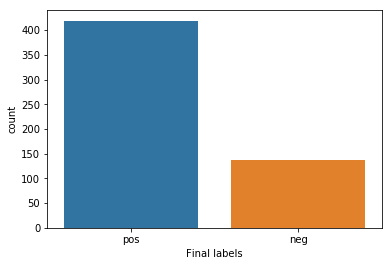

In [55]:
sns.countplot(data= df, x='Final labels');

In [66]:
df['Final labels'].value_counts()/len(df)

pos    0.752244
neg    0.247756
Name: Final labels, dtype: float64

Nevertheless vader has helped us filter misclassified reviews and improve our labels with some manual intervention.
More importantly it has provided us with a quantitative measure which can be leveraged for further classification.

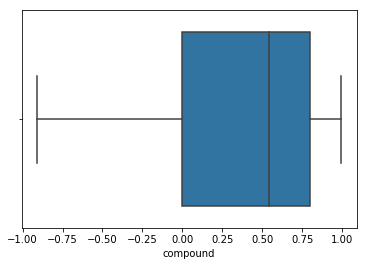

In [68]:
sns.boxplot(data=df,x='compound');
# 3 out 4 customers are happy with the product

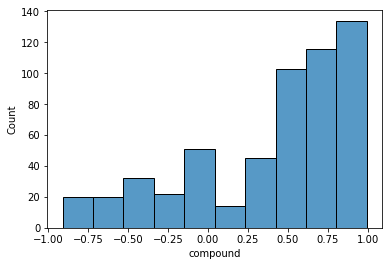

In [71]:
sns.histplot(data=df,x='compound',bins=10);
# Most positive people are extremely happy with the product
# Comparatively some are extremely disappointed

In [ ]:
# Segregate positive and negative reviews using final labels 
# Plot wordcloud for each 
# Draw inferences w.r.t challenges and features

In [64]:
def display_wordcloud(text):
    # Generate wordcloud

    #for word in []:
    #    STOPWORDS.add(word)
    path_to_font = 'C:/Users/priya/Downloads/bon_foyage/BonFoyageDemo.otf'
    path_to_image = 'C:/Users/priya/OneDrive/Desktop/NLP_Project/IMG.png'
    mask = np.array(Image.open(path_to_image))
    plt.figure(figsize=(40, 30))
    wordcloud = WordCloud(stopwords=STOPWORDS, font_path=path_to_font,
               mask=mask,
               #background_color="#d0f0bd",
               background_color="#f5baba",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(text)
    plt.imshow(wordcloud,interpolation="bilinear") # display image
    plt.axis("off"); #No axis details

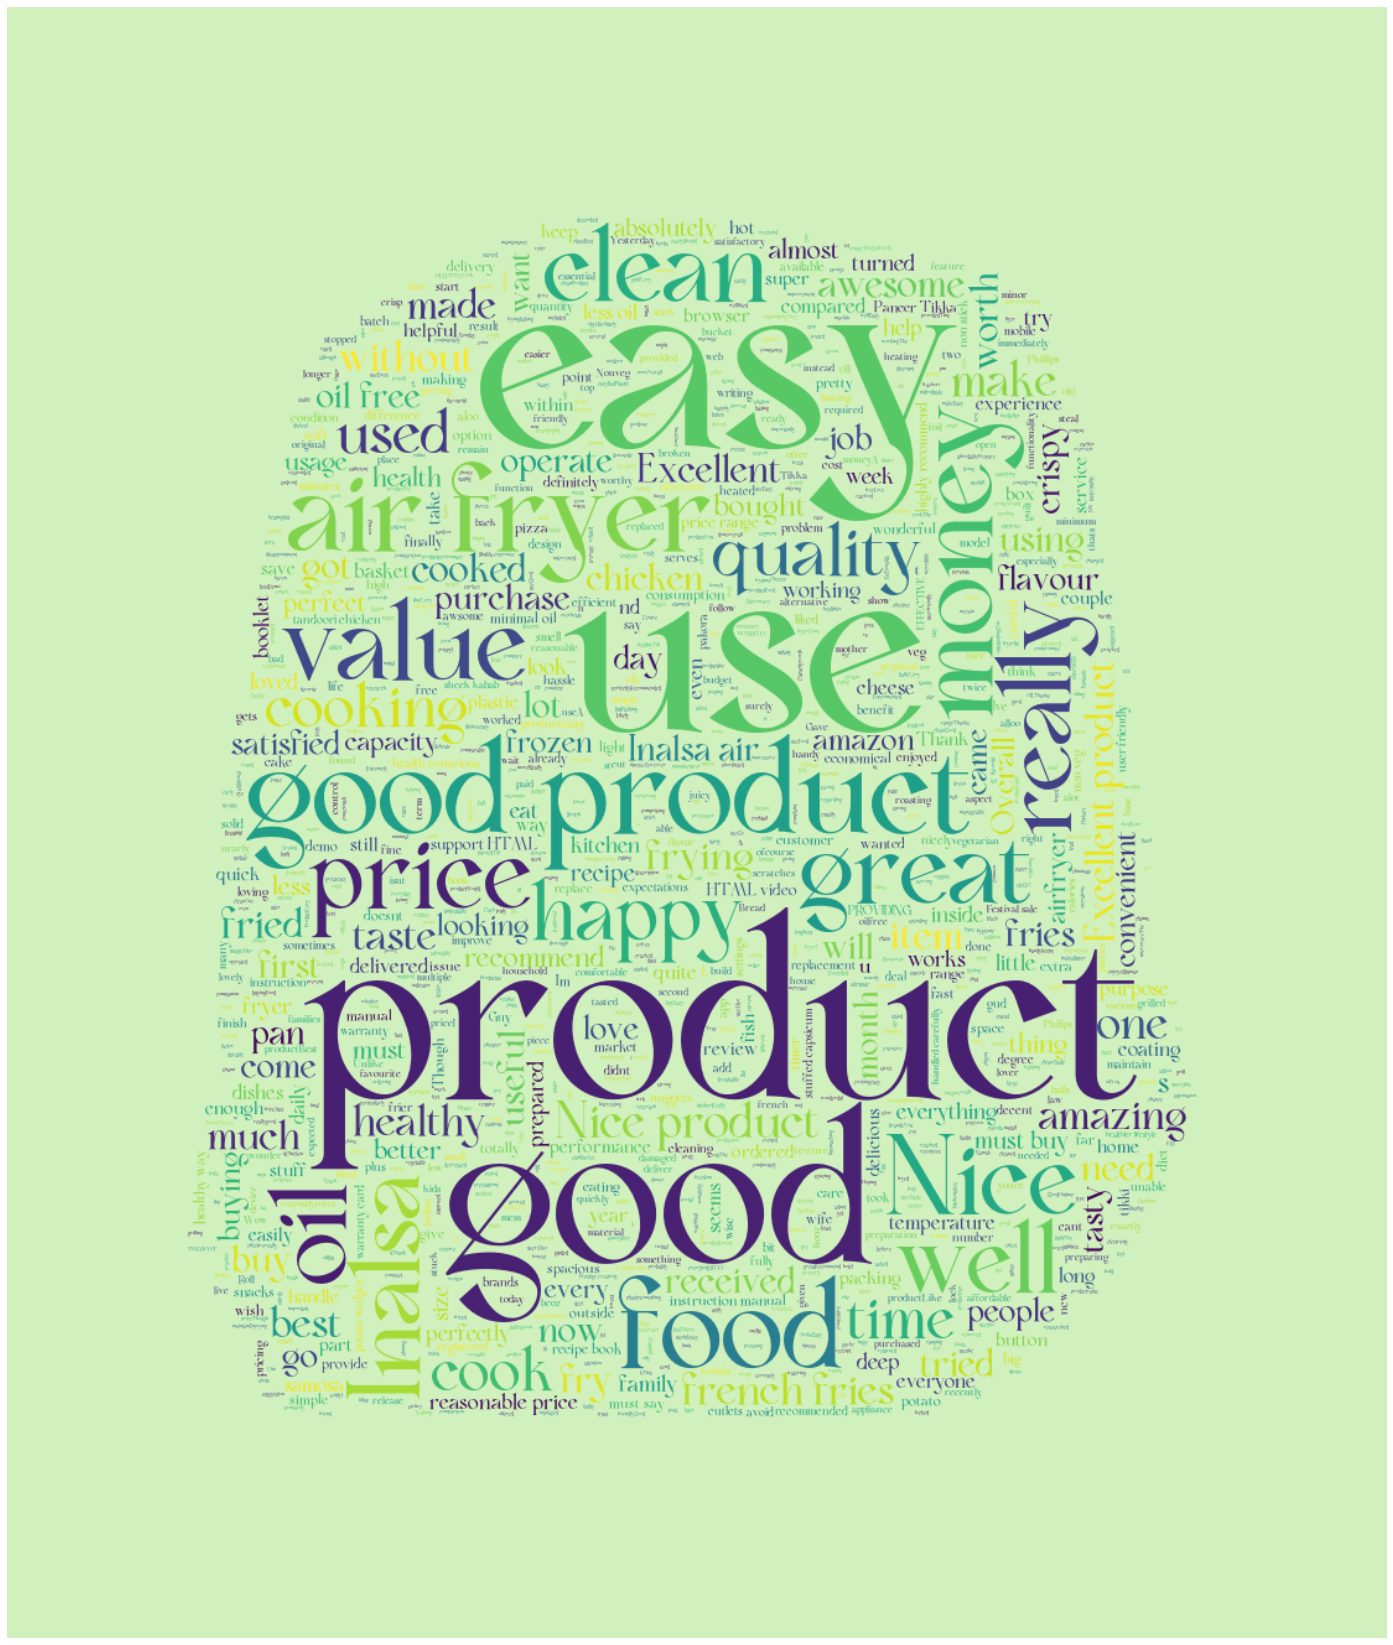

In [63]:
pos_reviews = df[df['Final label']=='pos']['cleaned review'].str.cat(sep=', ')
pos_reviews = ''.join(pos_reviews)
display_wordcloud(pos_reviews)

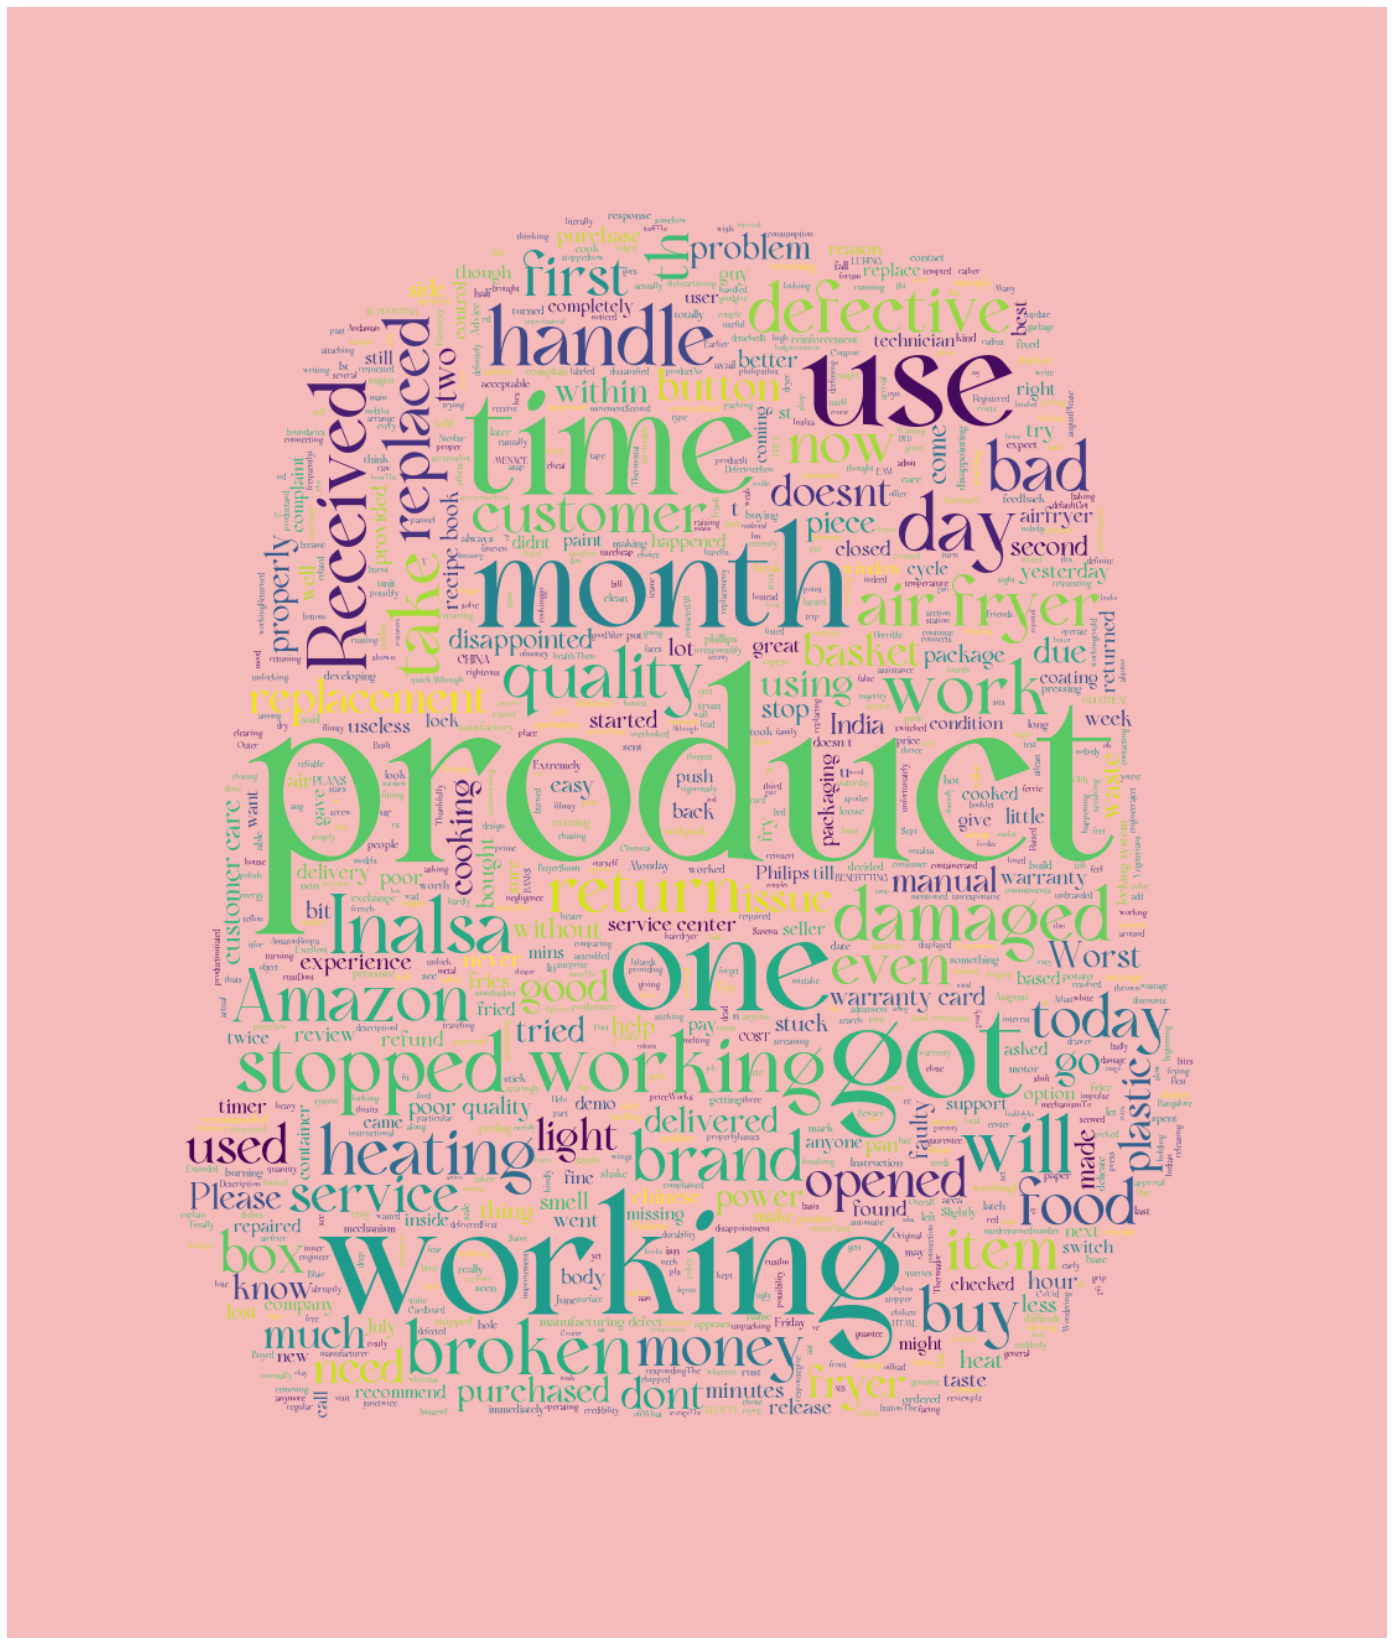

In [65]:
pos_reviews = df[df['Final label']=='neg']['cleaned review'].str.cat(sep=', ')
pos_reviews = ''.join(pos_reviews)
display_wordcloud(pos_reviews)

## Parts of Speech tagging

In [66]:
doc = spacy.load('en_core_web_sm')

In [ ]:
#def deEmoticon(inputString):
    #return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews
    #text=deEmoticon(review) # remove emojis
   #text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    #text_cleaned=text_cleaned.lower() # converting to lowercase
    #tokens=text_cleaned.split(" ")
    #
    # Taking only those words which are not stopwords
    #text_cleaned=" ".join([ps.stem(token) for token in tokens]) 